# Learning curve

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

from sklearn import metrics

# Load dataset

In [40]:
dataobj = load_breast_cancer()

X = pd.DataFrame(dataobj.data, columns=dataobj.feature_names)
y = dataobj.target

df = X
df['target'] = y

df.head(10)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,0
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,0
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,0
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,0
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,0


# Spliting data

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.7, random_state=10, stratify=y)

# Pipeline

In [42]:
scl = StandardScaler()
pca = PCA(n_components=.9)
clf = LogisticRegression(random_state=10, max_iter=1000)

pipe = Pipeline([
    ('scale', scl),
    ('pca', pca),
    ('clf', clf)
])

pipe

Pipeline(steps=[('scale', StandardScaler()), ('pca', PCA(n_components=0.9)),
                ('clf', LogisticRegression(max_iter=1000, random_state=10))])

# Learning curve

In [43]:
from sklearn.model_selection import learning_curve

## creating list of train size
train_size = np.linspace(0.1, 1, 10)
print(train_size)

[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


In [44]:
train_size, train_score, validation_score = learning_curve(
    estimator=pipe,
    X=X_train,
    y=y_train,
    train_sizes=train_size,
    cv=10,
    n_jobs=-1
)

In [45]:
## train accuracy score in each folds
df_train_score = pd.DataFrame(train_score, index=train_size)
df_train_score

,0,1,2,3,4,5,6,7,8,9
35,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
71,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
107,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
143,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
179,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
214,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
250,0.996000,0.996000,0.996000,0.996000,1.000000,0.996000,1.000000,1.000000,1.000000,1.000000
286,0.996503,0.996503,0.996503,0.996503,0.996503,0.996503,1.000000,0.996503,0.996503,0.996503
322,0.996894,0.996894,0.996894,0.996894,0.996894,0.996894,0.996894,0.996894,0.996894,0.996894
358,0.994413,0.994413,0.994413,0.994413,0.994413,0.994413,0.997207,0.994413,0.994413,0.997207


In [46]:
## covert to mean
df_train_mean = df_train_score.mean(axis=1).to_frame()
df_train_mean

,0
35,1.000000
71,1.000000
107,1.000000
143,1.000000
179,1.000000
214,1.000000
250,0.998000
286,0.996853
322,0.996894
358,0.994972


In [47]:
## test accuracy score in each folds
df_validation_score = pd.DataFrame(validation_score, index=train_size)
df_validation_score

,0,1,2,3,4,5,6,7,8,9
35,1.000,1.0,1.0,1.0,0.950,1.000,0.975,1.000,1.0,0.974359
71,1.000,1.0,1.0,1.0,0.925,1.000,0.950,1.000,1.0,0.974359
107,1.000,1.0,1.0,1.0,0.950,0.975,0.950,0.975,1.0,0.974359
143,1.000,1.0,1.0,1.0,0.925,0.975,0.975,1.000,1.0,0.974359
179,1.000,1.0,1.0,1.0,0.925,1.000,0.975,1.000,1.0,0.974359
214,0.975,1.0,1.0,1.0,0.925,0.975,0.975,1.000,1.0,0.974359
250,0.975,1.0,1.0,1.0,0.950,0.975,0.975,1.000,1.0,0.974359
286,0.975,1.0,1.0,1.0,0.950,0.975,0.975,1.000,1.0,0.974359
322,0.975,1.0,1.0,1.0,0.950,0.975,0.975,1.000,1.0,0.974359
358,0.975,1.0,1.0,1.0,0.950,0.975,0.975,1.000,1.0,0.974359


In [48]:
## covert to mean
df_validation_mean = df_validation_score.mean(axis=1).to_frame()
df_validation_mean

,0
35,0.989936
71,0.984936
107,0.982436
143,0.984936
179,0.987436
214,0.982436
250,0.984936
286,0.984936
322,0.984936
358,0.984936


# Ploting learing curve

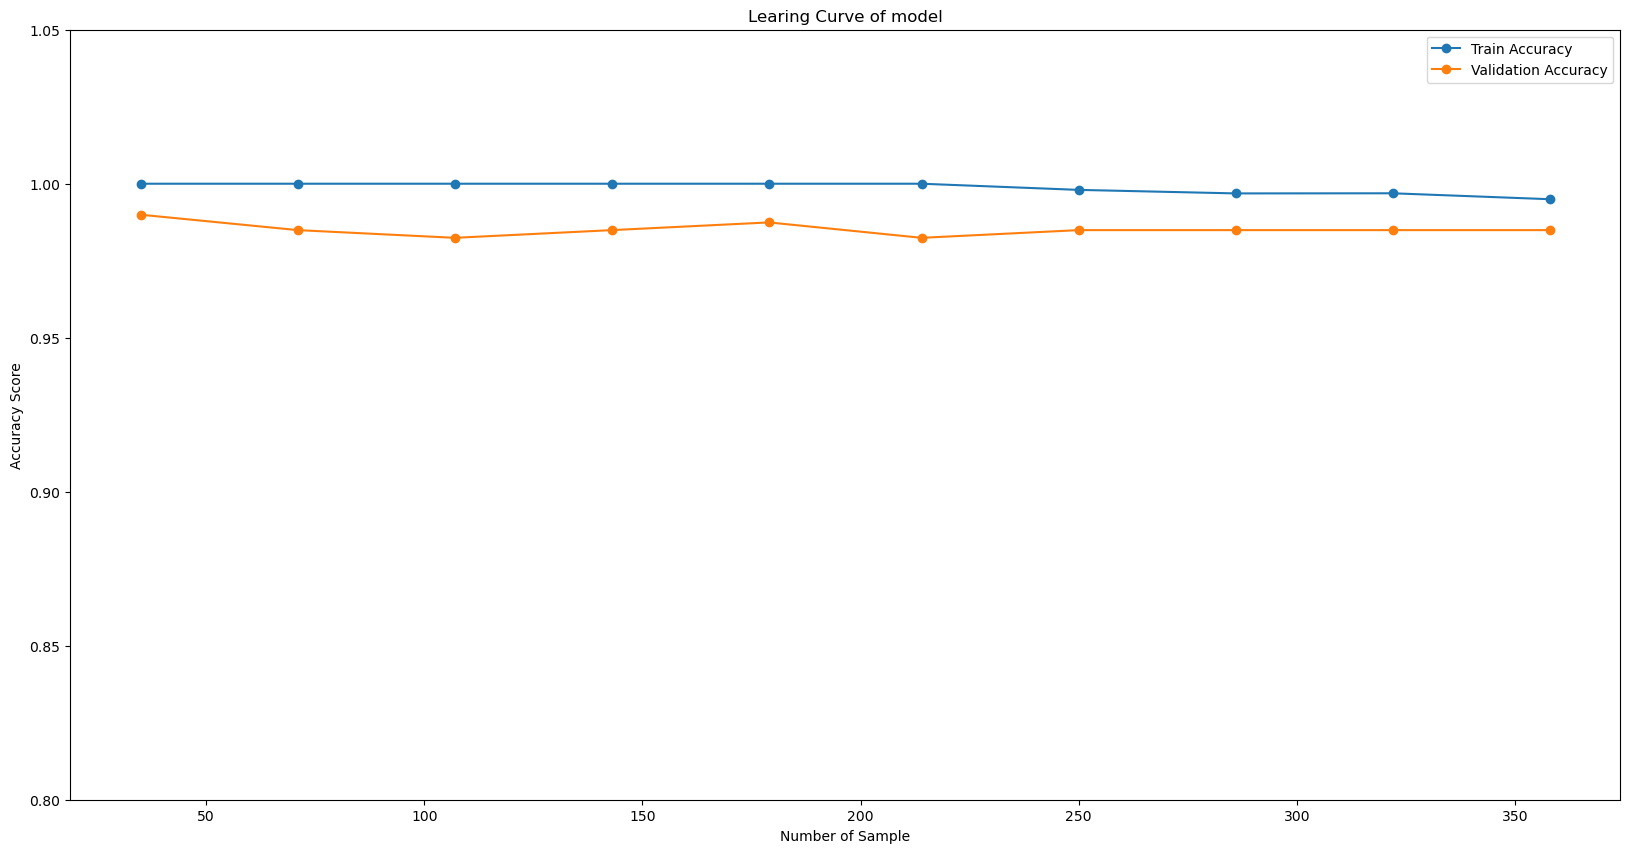

In [58]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(df_train_mean, label='Train Accuracy', marker='o')
ax.plot(df_validation_mean, label='Validation Accuracy', marker='o')
ax.set_ylabel('Accuracy Score')
ax.set_xlabel('Number of Sample')
ax.set_title('Learing Curve of model')
ax.set_ylim((.8, 1.05))
ax.legend();